## Plotting data from Duello scan
The reduced second virial coefficients for the patchy particle $P^1_8$ over temperature and ionic strength are calculated and saved to a csv file. The data is then plotted as an image with a colour bar showing the value of $B_2/B_2HS$ at respecitive temperature and molarity. Two plots are created, one from calculations with a fixed dielectric constant and the other with a varying one. This is done in order to see how big of a differences it makes that the dielectric constant is temperature dependent or not. 

Contour lines are created from interpolation of the data points with a smoothing spline method. These help to illustrate the trends of the non-ideal solution behavior resulting from two-body interactions. In this case, from the two-body interactions between the $P^1_8$ patchy particles.


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage


# Set default font size and figure size for all plots
plt.rcParams.update({"font.size": 24, "figure.figsize": [10.0, 12]})
plt.rcParams["text.color"] = "black"
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams["xtick.color"] = "black"
plt.rcParams["ytick.color"] = "black"
plt.rcParams["axes.titlecolor"] = "black"

#### Definition of functions:

In [2]:
def get_B2(cs_range, file):
    # Define the temperature range
    temperatures = np.arange(275, 331, 1)
    # Read the B2 values from the file
    B2_values = np.genfromtxt(file, delimiter=" ")
    # Check that the correct number of salt concentrations are given
    if len(cs_range) != B2_values.shape[1]:
        raise ValueError(
            "The number of salt concentrations in the file does not match the number of salt concentrations given."
        )
    return B2_values.T, cs_range, temperatures


def plot_B2(
    ax, molarity, temperatures, B2, mol_lim, temp_lim, contour_lines, manual_locations
):
    # Align B2 data with the given molarity and temperature range
    tolerance = 1e-6
    m1 = np.where(np.abs(molarity - mol_lim[0]) < tolerance)[0][0]
    m2 = np.where(np.abs(molarity - mol_lim[1]) < tolerance)[0][0]
    B2_aligned = B2[m1 : m2 + 1, :]
    t1 = np.where(temperatures == temp_lim[0])[0][0]
    t2 = np.where(temperatures == temp_lim[1])[0][0]
    B2_aligned = B2_aligned[:, t1 : t2 + 1]

    # Plot the B2 data
    Cbar = ax.imshow(
        B2_aligned,
        aspect="auto",
        origin="lower",
        extent=[temp_lim[0], temp_lim[1], mol_lim[0], mol_lim[1]],
    )
    ax.set_xlabel("Temperature (K)")

    # Interpolate the data to get a smoother plot
    interpolation = ndimage.zoom(B2_aligned, zoom=4, order=4)

    # Plot contour lines from the interpolated data
    zoomM = np.linspace(mol_lim[0], mol_lim[1], interpolation.shape[0])
    zoomT = np.linspace(temp_lim[0], temp_lim[1], interpolation.shape[1])
    zoomM, zoomT = np.meshgrid(zoomM, zoomT, indexing="ij")
    contour_levels = [-20, -15, -10, -5, -1, 15]  # all available levels
    contour_levels = contour_levels[
        contour_lines[0] : contour_lines[1] + 1
    ]  # choose the levels you want to plot
    contour = ax.contour(
        zoomT,
        zoomM,
        interpolation,
        levels=contour_levels,
        colors=["black", "tomato", "white", "purple", "#7f3db3", "indigo"],
    )  # ['black', 'white', 'cyan', 'magenta'])'#0000dc','#7f3db3
    ax.clabel(contour, inline=True, fontsize=22, manual=manual_locations)

    return Cbar

#### Read the B2 values from CSV file and the molarity and temperature values.

In [3]:
#  Make sure that the csv file is in plot directory

# Read the B2 values from the calculations with a varying dielectric constant
molarity = np.linspace(0.0025, 0.15, 60)
molarity = np.insert(molarity, [0], [0.001, 0.0015, 0.002])

B2, molarity, temperatures = get_B2(molarity, "values_redB2.csv")

# Read the B2 values from the calculations with a fixed dielectric constant
fixedEr_molarity = np.linspace(0.0025, 0.1, 40)
fixedEr_molarity = np.insert(fixedEr_molarity, [0], [0.001, 0.0015, 0.002])

fixedEr_B2, fixedEr_molarity, fixedEr_temperatures = get_B2(
    fixedEr_molarity, "fixedEr_values_redB2.csv"
)

#### Adjust the range of plot:
The values provided in the range has to be found in the molarity respective temperature array. To check which values they consist of, uncomment respective line of code indicated below.

In [7]:
mol_lim = [
    0.001,
    0.1,
]  # Provide a molarity range - Has to be a value in the molarity array
temp_lim = [
    275,
    325,
]  # Provide a temperature range - Has to be a value in the temperature array

# to see values of molarity uncomment line below
# print(molarity)

# to see values of temperature uncomment line below
# print(temperatures)

#### Adjust range of contour lines:
Depending on range of temperature and molarity plotted, a varying number of contour lines will make sense to plot. All available contour lines are [-20,-15, -10, -5, -1, 15]. Provide a range of contour lines you want to plot. To plot all lines [0, 5] should be provided. Change accordingly below. 
If you want to change the position of where the contour line labels are plotted, adjust the manual_locations accordingly.

In [8]:
contour_lines = [0, 5]  # choose the contour lines you want to plot

# Provide the manual locations for the contour lines - change the values to the ones you want
manual_locations_ax1 = [
    (315, 0.02),
    (300, 0.04),
    (300, 0.03),
    (300, 0.05),
    (300, 0.08),
    (295, 0.002),
]
manual_locations_ax2 = [
    (290, 0.03),
    (300, 0.04),
    (300, 0.03),
    (300, 0.05),
    (300, 0.08),
    (295, 0.002),
]

#### Plot the B2 values in the given range:

The reduced $B_2$ values from the csv-files are plotted on the provided range of temperature and molarity. The two cases with a varying dielectric constant and the fixed dielectric constant are plotted side-by-sidev with one common colour bar. The results show clearly that there is a large effect of varying the dielectric constant or not on the measured protein electrostatics. 

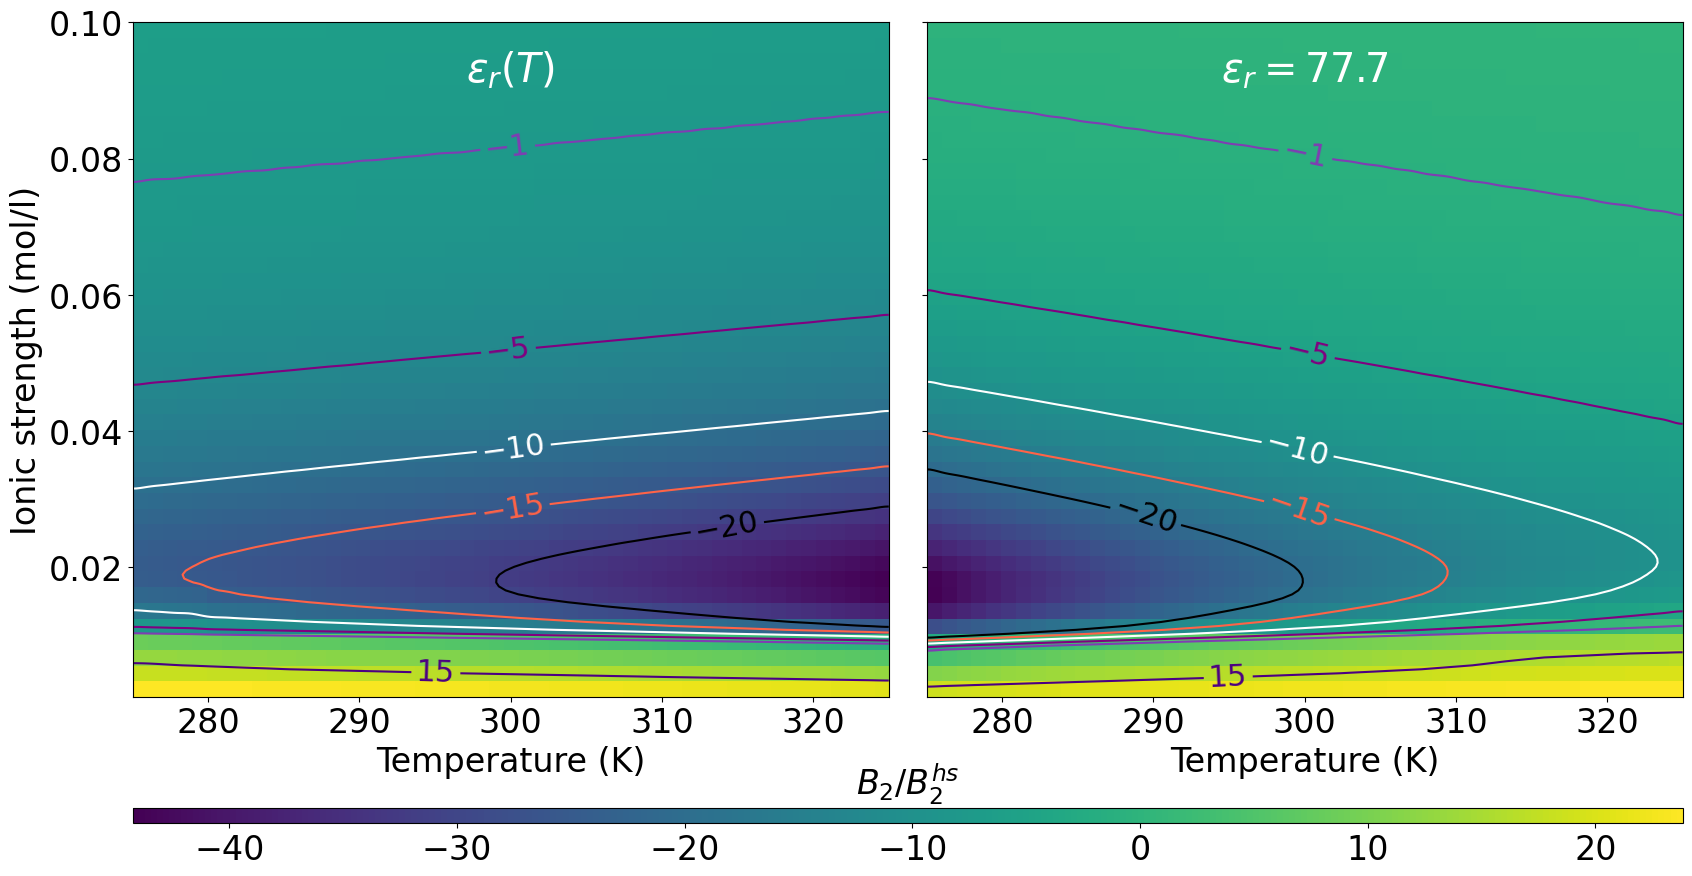

In [30]:
# Initialize the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05)  # Decrease horizontal spacing
cmap = plt.cm.viridis

# Plot the first B2 data
Cbar1 = plot_B2(
    ax1,
    molarity,
    temperatures,
    B2,
    mol_lim,
    temp_lim,
    contour_lines,
    manual_locations_ax1,
)
ax1.set_ylabel("Ionic strength (mol/l)")
ax1.set_title(r"$\epsilon_r(T)$", y=0.9, color="w")

# Plot the second B2 data
Cbar2 = plot_B2(
    ax2,
    fixedEr_molarity,
    fixedEr_temperatures,
    fixedEr_B2,
    mol_lim,
    temp_lim,
    contour_lines,
    manual_locations_ax2,
)
ax2.set_title(r"$\epsilon_r = 77.7$", y=0.9, color="w")

# Add a single colorbar for both plots
bar = fig.colorbar(Cbar2, ax=[ax1, ax2], label=r"$B_2/B_2^{hs}$", orientation='horizontal', pad=0.12, aspect= 100,  location='bottom')
bar.set_label(r"$B_2/B_2^{hs}$", fontsize=24, labelpad = 10)
bar.ax.xaxis.set_label_position('top')  
# Save the plot
plt.savefig("B2_plot.pdf", bbox_inches="tight", facecolor="white", dpi=300)
plt.show()